In [25]:
import numpy as np
import tensorflow.keras as keras
import tensorflow as tf

In [26]:
(aaa,bbb), (ccc,ddd)= keras. datasets.mnist.load_data()
aaa.shape, bbb.shape, ccc.shape, ddd.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [27]:
x= aaa[30]
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()
    
#range(28)代表由28X28矩陣所組成

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 11 19 95143143143143143143143143 33  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 90149208253253253253253253253253253253217 22  0  0  0  0  0  0  0  0  0  0
  0  0  0255253251222222161140 99 99 99 99143253253113  0  0  0  0  0  0  0  0  0  0
  0  0  0217210 86  0  0  0  0  0  0  0 29161253253 82  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 33203253253174 13  0  0  0  

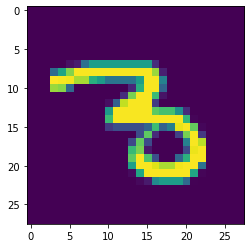

In [28]:
import matplotlib.pyplot as pl

pl.imshow(x)

In [29]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(256,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [30]:
network.compile(
    optimizer = 'Nadam', # 指定優化器→控制梯度下降的確切規則
    loss = 'categorical_crossentropy', # 指定損失函數
    metrics = ['accuracy'] # 指定評量準則
)

In [31]:
aaa = aaa.reshape((60000,28*28))
aaa = aaa.astype('float32')/ 255

ccc = ccc.reshape((10000,28*28))
ccc = ccc.astype('float32')/ 255

In [32]:
from tensorflow.keras.utils import to_categorical

bbb = to_categorical(bbb)
ddd = to_categorical(ddd)

In [33]:
network.fit(aaa,bbb,epochs=16,batch_size=128,validation_split=0.2)

Epoch 1/16
375/375 [==============================] - 3s 7ms/step - loss: 0.2582 - accuracy: 0.9257 - val_loss: 0.1243 - val_accuracy: 0.9622
Epoch 2/16
375/375 [==============================] - 3s 7ms/step - loss: 0.0913 - accuracy: 0.9726 - val_loss: 0.0977 - val_accuracy: 0.9709
Epoch 3/16
375/375 [==============================] - 3s 7ms/step - loss: 0.0549 - accuracy: 0.9826 - val_loss: 0.0971 - val_accuracy: 0.9707
Epoch 4/16
375/375 [==============================] - 2s 7ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0785 - val_accuracy: 0.9780
Epoch 5/16
375/375 [==============================] - 3s 7ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0894 - val_accuracy: 0.9740
Epoch 6/16
375/375 [==============================] - 3s 7ms/step - loss: 0.0200 - accuracy: 0.9932 - val_loss: 0.0764 - val_accuracy: 0.9780
Epoch 7/16
375/375 [==============================] - 3s 7ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0999 - val_accuracy: 0.9760
Epoch 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


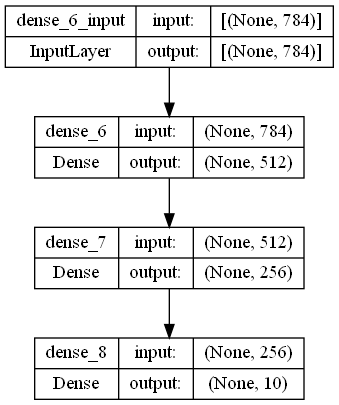

In [34]:
from tensorflow.keras.utils import plot_model
network.summary()

plot_model(network, 
    show_shapes= True,
)

In [35]:
test_loss , test_acc = network.evaluate(ccc,ddd)

print('test_acc:',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1032 - accuracy: 0.9792
test_acc: 0.979200005531311
